In [20]:
#Let's start with importing necessary libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()

In [21]:
# Importing diabetes dataset using pandas
data =  pd.read_csv('diabetes.csv') 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
# Describe dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


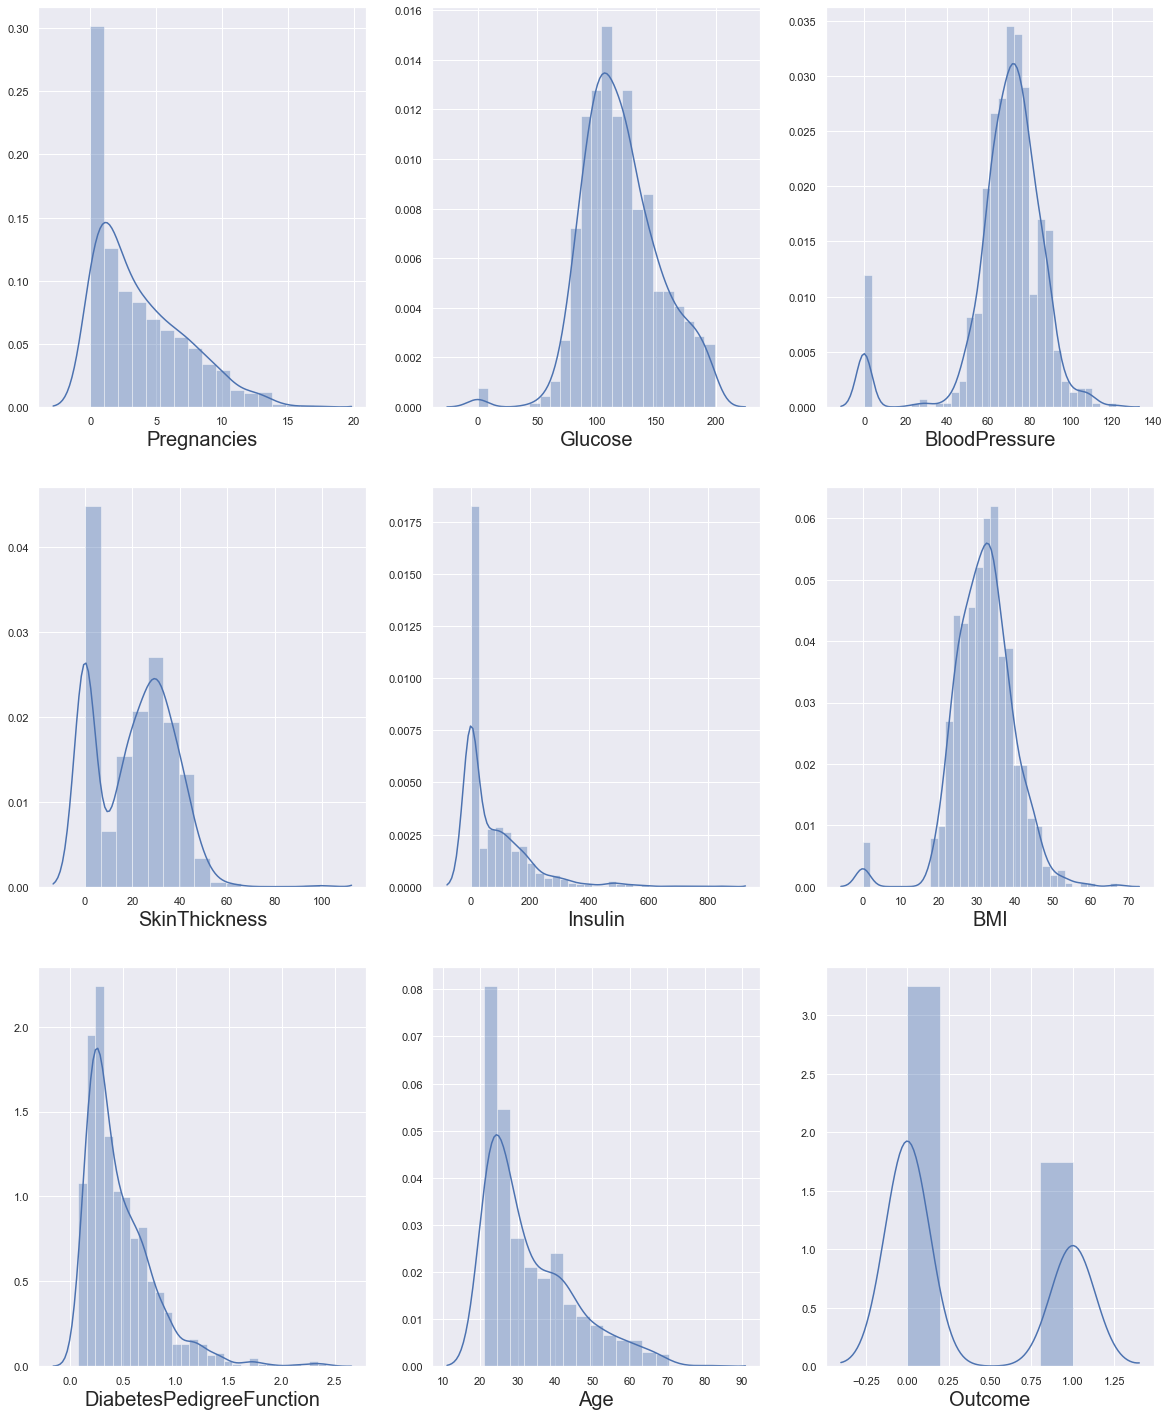

In [23]:
# Let's check whether data is normalised or not
plt.figure(figsize=(20,25), facecolor='w')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.show()

As we can see Glucose, Bloodpressure, Insulin, Skin Thickness and BMI has lots of zero values which is practically not possible let's correct this.

In [24]:
# Replacing zero values by its mean
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

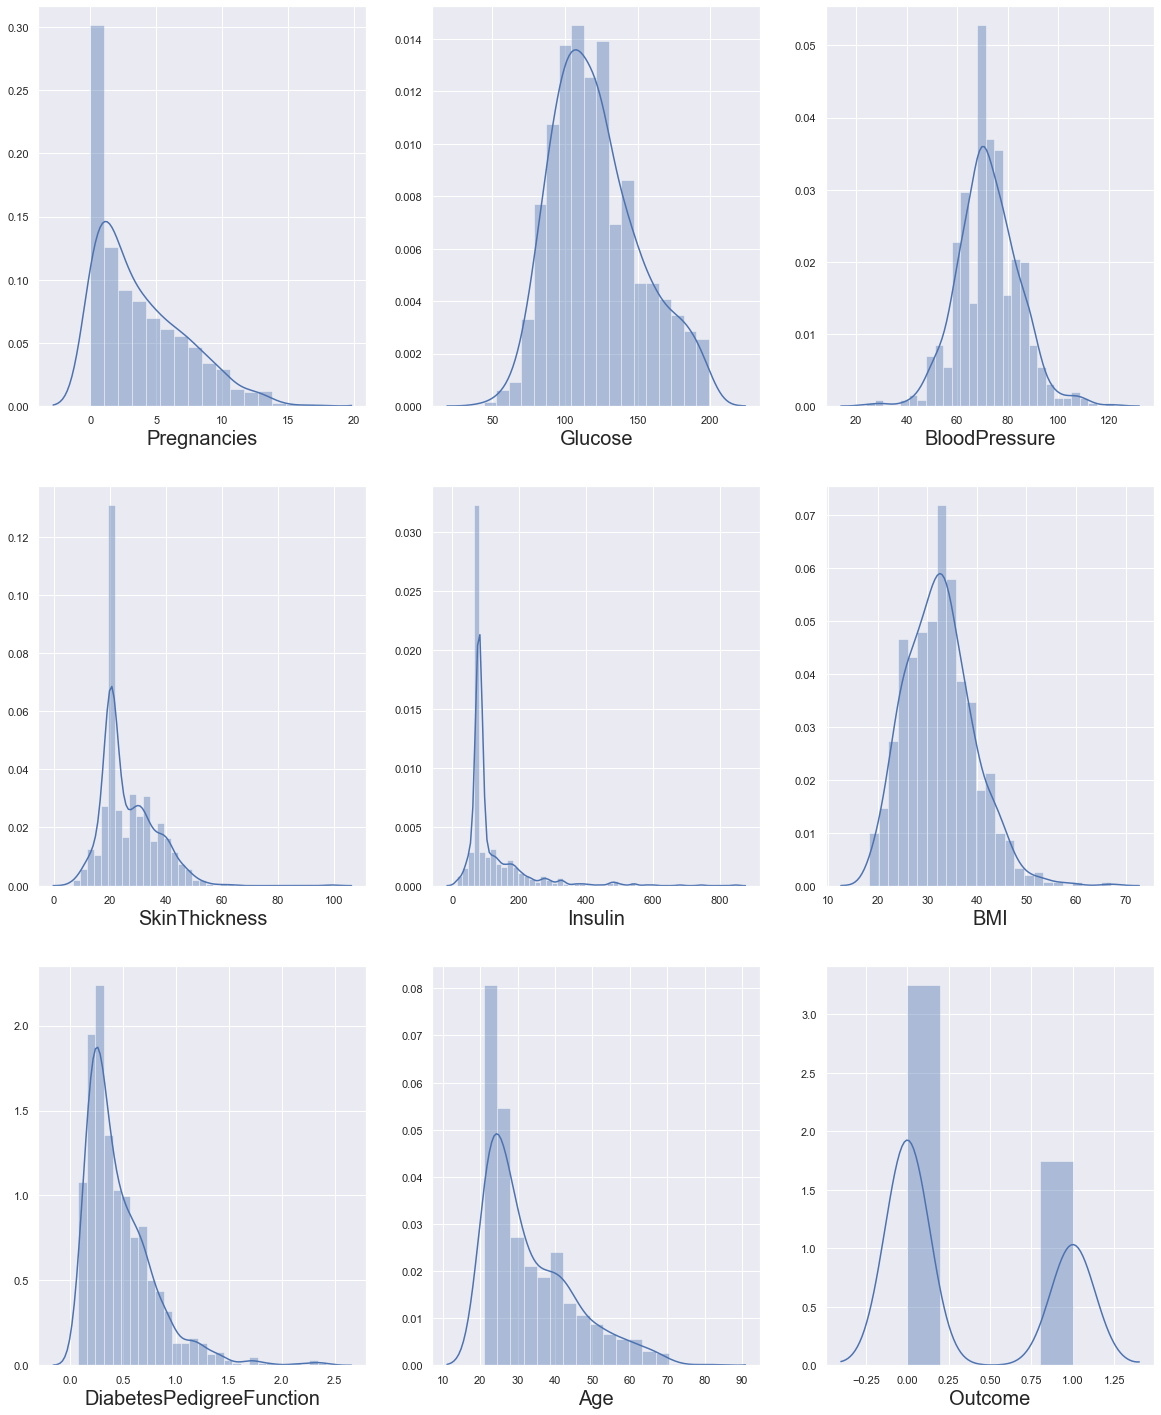

In [25]:
plt.figure(figsize=(20,25), facecolor='w')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.show()

Now we can see the data is more normalised than before

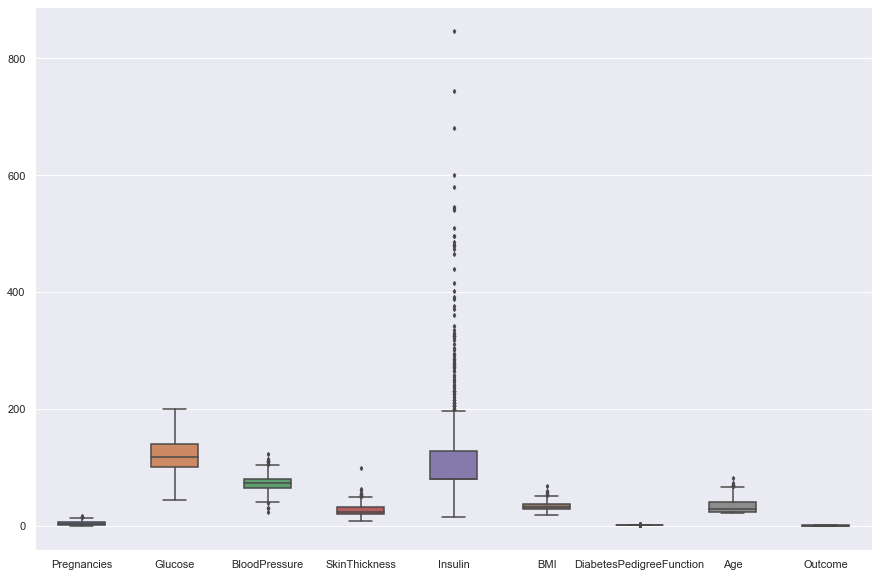

In [26]:
# Let's check are there any outliers in my dataset
fig , ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = data,  width = 0.5,fliersize = 3)

Features like pregnancy, skin thickness, Insulin, BMI, Diabetes Pedigree Function has outliers let's remove them

In [27]:
# Removing 1-2% percent of data to remove outliers
q = data['Pregnancies'].quantile(0.98)

In [28]:
data_cleaned = data[data['Pregnancies']<q]

In [29]:
q = data_cleaned['BMI'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['BMI']<q]

q = data_cleaned['SkinThickness'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['SkinThickness']<q]

q = data_cleaned['Insulin'].quantile(0.95)
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

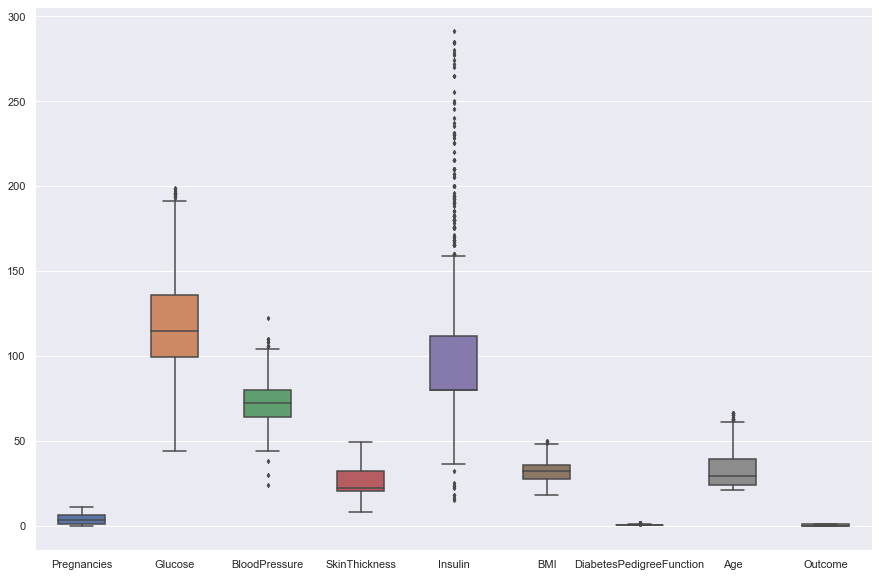

In [30]:
fig , ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = data_cleaned,  width = 0.5,fliersize = 3)

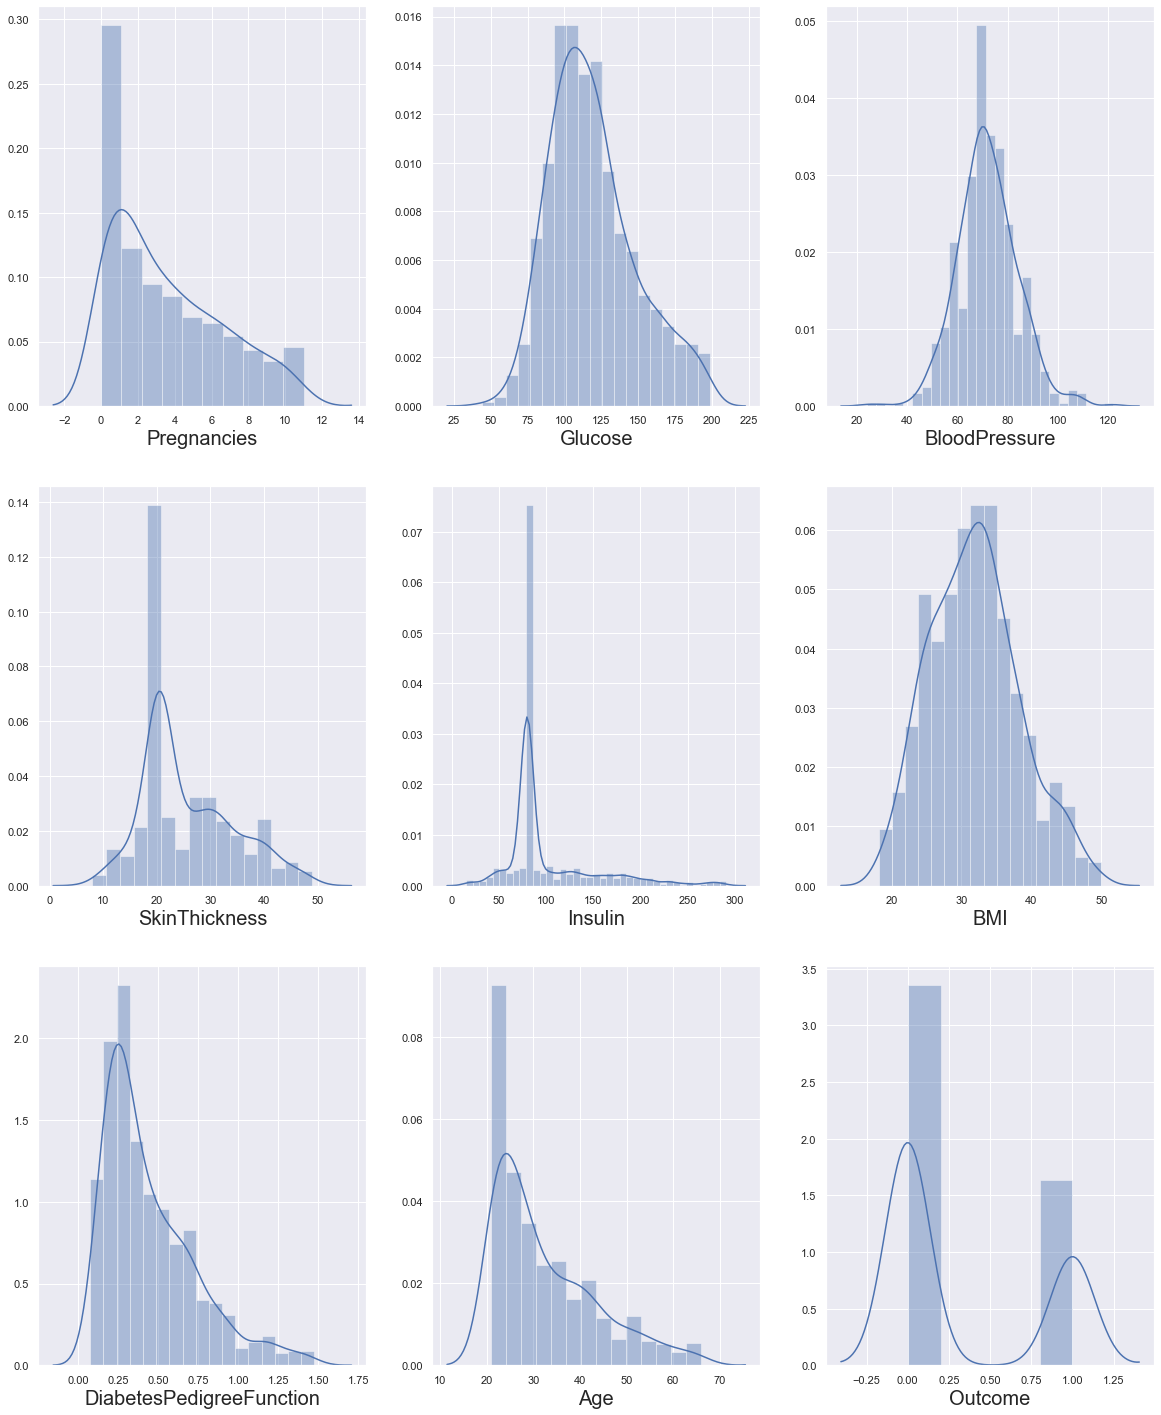

In [31]:
plt.figure(figsize=(20,25), facecolor='w')
plotnumber = 1

for column in data_cleaned:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber+=1
plt.show()

Now the data is pretty much normalised in comparision to before

In [32]:
# Let's divide our independent and dependent features and name them x & y respectively.
X = data_cleaned.iloc[:,:-1]
y = data_cleaned['Outcome']

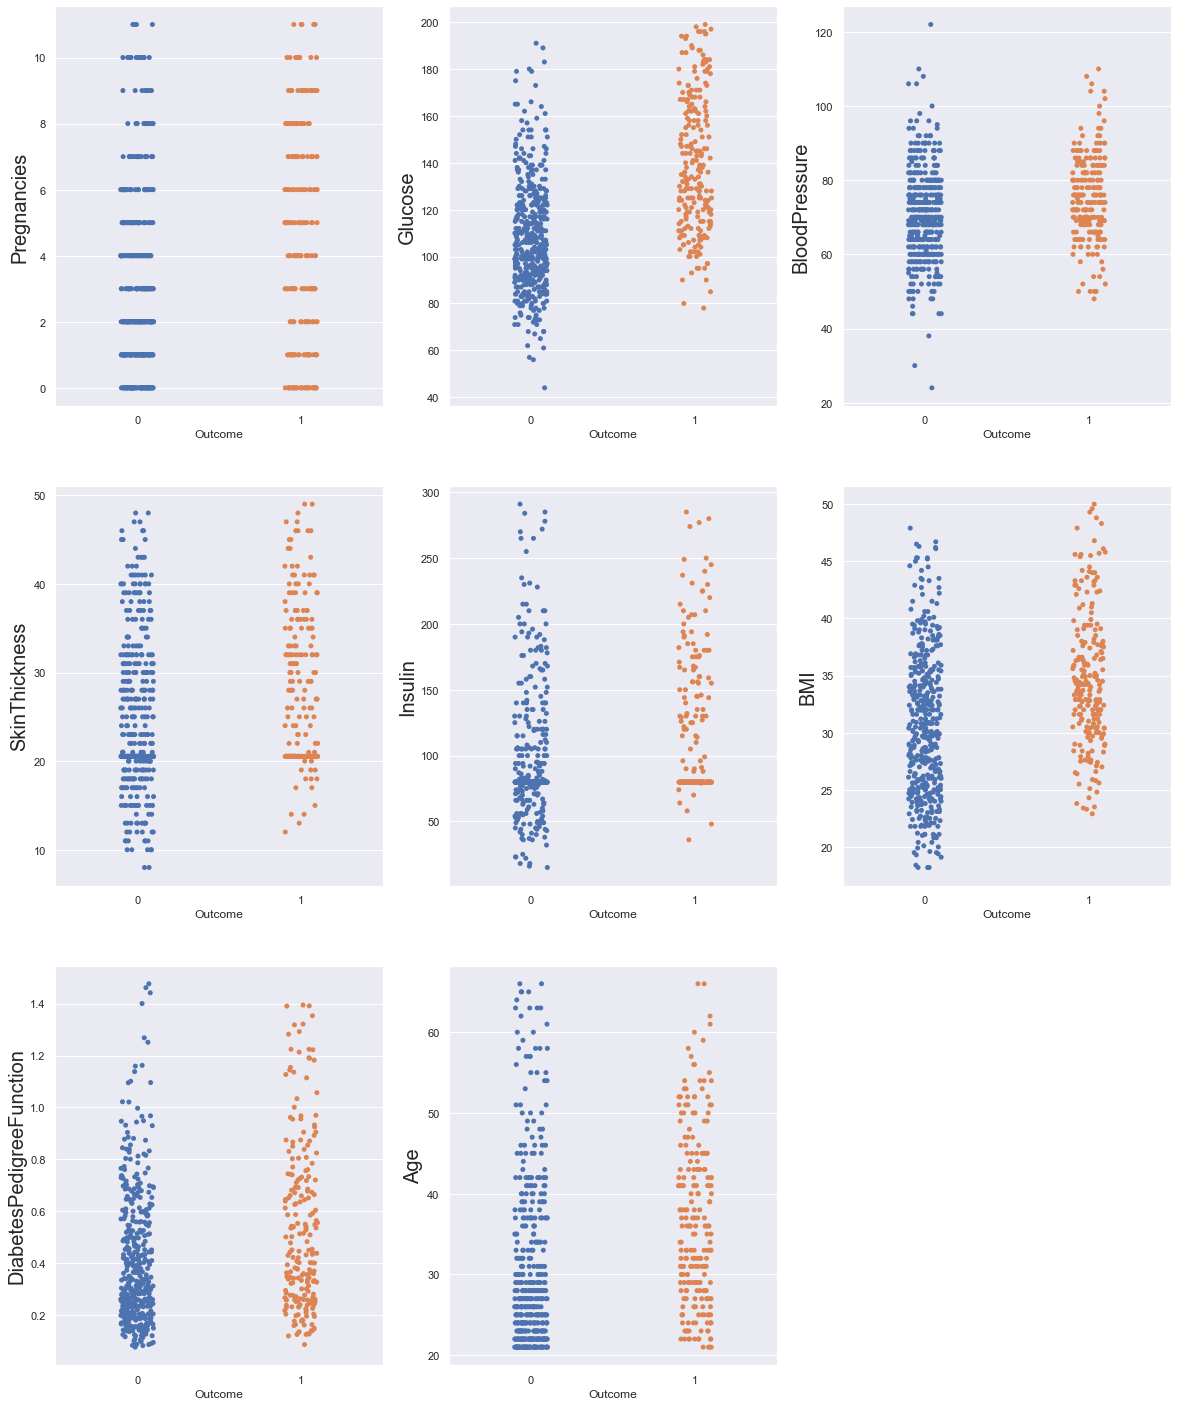

In [33]:
# Let's compare the outcome with each feature
plt.figure(figsize=(20,25), facecolor='w')
plotnumber = 1

for column in X:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y = data_cleaned[column], x = 'Outcome', data = data_cleaned)
        plt.ylabel(column, fontsize = 20)
        
    plotnumber+=1
plt.show()

As we can see range of every feature is different, let's correct this

In [34]:
# Using Standard Scaler to standardise or scale down all the independent features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 7.96753910e-01,  9.83984062e-01,  4.52611463e-04, ...,
         2.65819648e-01,  6.30484542e-01,  1.60141519e+00],
       [-8.64793539e-01, -1.16977621e+00, -5.04474494e-01, ...,
        -8.31445036e-01, -3.38078670e-01, -1.32706484e-01],
       [ 1.46137289e+00,  2.18051755e+00, -6.72783529e-01, ...,
        -1.34872696e+00,  7.88402456e-01, -4.14369227e-02],
       ...,
       [ 4.64444420e-01,  6.09439465e-02,  4.52611463e-04, ...,
        -8.94145875e-01, -7.10063091e-01, -2.23976046e-01],
       [-8.64793539e-01,  2.31877301e-01, -1.00940160e+00, ...,
        -2.82812694e-01, -3.45097244e-01,  1.32760650e+00],
       [-8.64793539e-01, -8.96282840e-01, -1.67856424e-01, ...,
        -2.35787064e-01, -4.64413001e-01, -8.62862978e-01]])

In [35]:
# Now let's check the collinearity between data by checking Variance Inflation Factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

vif

C:\Users\hsahu\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1881: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


,VIF,Features
0,1.449056,Pregnancies
1,1.304263,Glucose
2,1.262686,BloodPressure
3,1.470049,SkinThickness
4,1.271017,Insulin
5,1.513160,BMI
6,1.042300,DiabetesPedigreeFunction
7,1.662728,Age


VIF of each feature is below 5 so it doesn't show multicollinearity now we can move furthur and divide our data in train and test set

In [36]:
# Dividing our data in train and test data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y , test_size = 0.25, random_state = 355)

In [50]:
# Applying logistic regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

C:\Users\hsahu\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
# Using pickle to save our final model
import pickle

with open('modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg, f)
    
with open('StandardScaler.sav', 'wb') as f:
    pickle.dump(scaler, f)

In [52]:
# Let's Check how good our model is...
y_pred = log_reg.predict(x_test)

### Accuracy
Total number of correct classification divided by all classifications.
<p>Accuracy = (TP + TN)/(TP + TN + FP + FN)</p>

In [40]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8284023668639053

### Confustion Matrix

In [41]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[108,   9],
       [ 20,  32]], dtype=int64)

In [42]:
true_positive = conf_mat[0][0]
true_negative = conf_mat[1][1]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]

In [43]:
Accuracy = (true_positive+true_negative)/(true_positive+true_negative+false_negative+false_positive)
Accuracy

0.8284023668639053

In [44]:
# Recall
recall = true_positive/(true_positive+false_negative)
recall

0.84375

In [45]:
# Precision
precision = true_positive/(true_positive+false_positive)
precision

0.9230769230769231

In [46]:
# F1 Score
f1_score = 2*(recall*precision)/(recall+precision)
f1_score

0.8816326530612245

In [47]:
# AUC
auc = roc_auc_score(y_test, y_pred)
auc

0.7692307692307693

In [48]:
 fpr, tpr, thresholds = roc_curve(y_test, y_pred)

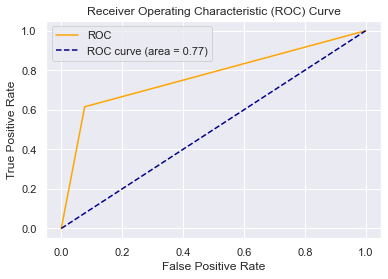

In [49]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

As we can see ROC curve is covering 77% area it means our model is pretty much good to go.

## Summary
In our case we have to consider Recall as in diabetes diagonosis we have to predict true positive result more precisely and as we can see our recall or sesitivity is quite good 84.37%.

In [53]:
log_reg.predict([[1, 89, 66, 23, 94, 28.1, 0.167, 21]])

array([1], dtype=int64)